# Let's hope it works

## Loading the faces data

In [2]:
import selenium


In [3]:
import os
import requests
import time
from bs4 import BeautifulSoup
from urllib.parse import quote
from selenium import webdriver


In [10]:
def download_images(player_name):
    # Create a directory to save the images
    player_folder_path = f"./data/faces/{player_name}"
    os.makedirs(player_folder_path, exist_ok=True)

    # Define the URL for Getty Images
    encoded_player_name = quote(player_name)
    url = f"https://www.gettyimages.be/photos/{encoded_player_name}?assettype=image&family=editorial&phrase={encoded_player_name}&sort=mostpopular"

    # Configure the Chrome driver (Make sure you have the correct chromedriver installed)
    driver = webdriver.Chrome()

    try:
        # Access the URL
        driver.get(url)
        time.sleep(5)  # Allow time for the page to load

        # Extract image URLs
        image_elements = driver.find_elements("xpath", '//img[contains(@src, "https://media.gettyimages.com")]')

        # Download and save 30 images
        count = 0
        for img in image_elements:
            img_url = img.get_attribute("src")
            img_data = requests.get(img_url).content
            with open(f"{player_folder_path}/{player_name}_{count}.jpg", "wb") as handler:
                handler.write(img_data)
            count += 1
            if count == 30:
                break

        print(f"Downloaded {count} images of {player_name} from Getty Images.")

    except Exception as e:
        print(f"Failed to retrieve images of {player_name} from Getty Images. Error: {e}")

    finally:
        # Close the browser
        driver.quit()


In [49]:
# # Downloading images
# player_list = ['Ronaldo','Benzema', 'Van de Beek']

# for player_name in player_list:
#     download_images(player_name)


## Loading the stats data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
attacking = pd.read_csv("raw_data/stats/attacking.csv")


In [6]:
attacking.head()


,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9


In [7]:
print(f"The shape is : {attacking.shape}")
print(f"The number of unique players is : {attacking['player_name'].nunique()}")


The shape is : (176, 9)
The number of unique players is : 176


In [18]:
print(f"The number of unique teams is : {attacking['club'].nunique()}")


The number of unique teams is : 32


In [8]:
key_stats = pd.read_csv("raw_data/stats/key_stats.csv")


In [9]:
key_stats.sample(10)


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
494,Delaney,Sevilla,Midfielder,200,4,0,0,28.1
653,Bakayoko,Milan,Defender,56,3,0,0,8.1
189,Clinton Mata,Club Brugge,Defender,528,6,0,0,59.9
45,Origi,Liverpool,Forward,187,7,1,1,23.8
344,Larin,Beşiktaş,Forward,354,5,1,0,40.2
603,Shabanov,Dynamo Kyiv,Defender,90,1,0,0,10.7
113,Brozović,Inter,Midfielder,635,8,1,0,89.3
42,Gomez,Liverpool,Defender,245,7,0,0,30.4
287,Hakan Çalhanoğlu,Inter,Midfielder,419,6,0,0,55.2
463,Klaassen,Ajax,Midfielder,232,7,1,1,33.6


In [13]:
team_names = ['Real Madrid', 'Liverpool', 'Man. United', 'Villareal', 'Benfica', 'Bayern', 'Atlético', 'Chelsea']
team_players_dict = {}
for team_name in team_names:
    team_players_dict[team_name] = list(key_stats[key_stats.club == team_name].player_name.unique())

team_players_dict


{'Real Madrid': ['Courtois',
  'Vinícius Júnior',
  'Benzema',
  'Modrić',
  'Éder Militão',
  'Alaba',
  'Carvajal',
  'Casemiro',
  'Kroos',
  'Mendy',
  'Valverde',
  'Nacho',
  'Rodrygo',
  'Lucas Vázquez',
  'Camavinga',
  'Asensio',
  'Jović',
  'Marcelo',
  'E. Hazard',
  'Miguel Gutiérrez',
  'Ceballos',
  'Mariano Díaz',
  'Vallejo',
  'Bale',
  'Blanco'],
 'Liverpool': ['Alisson Becker',
  'Salah',
  'Fabinho',
  'Robertson',
  'Mané',
  'Van Dijk',
  'Alexander-Arnold',
  'Konaté',
  'Henderson',
  'Matip',
  'Thiago Alcántara',
  'Diogo Jota',
  'Keïta',
  'Luis Díaz',
  'Tsimikas',
  'Firmino',
  'Oxlade-Chamberlain',
  'Gomez',
  'Minamino',
  'Milner',
  'Origi',
  'Jones',
  'N. Williams',
  'Morton',
  'Phillips',
  'Elliott',
  'Woltman',
  'Bradley'],
 'Man. United': ['De Gea',
  'Ronaldo',
  'Maguire',
  'Bruno Fernandes',
  'Fred',
  'Lindelöf',
  'Wan-Bissaka',
  'McTominay',
  'Shaw',
  'Sancho',
  'Varane',
  'Pogba',
  'Greenwood',
  'Alex Telles',
  'Rashford'

{'Real Madrid': ['Courtois',
  'Vinícius Júnior',
  'Benzema',
  'Modrić',
  'Éder Militão',
  'Alaba',
  'Carvajal',
  'Casemiro',
  'Kroos',
  'Mendy',
  'Valverde',
  'Nacho',
  'Rodrygo',
  'Lucas Vázquez',
  'Camavinga',
  'Asensio',
  'Jović',
  'Marcelo',
  'E. Hazard',
  'Miguel Gutiérrez',
  'Ceballos',
  'Mariano Díaz',
  'Vallejo',
  'Bale',
  'Blanco'],
 'Liverpool': ['Alisson Becker',
  'Salah',
  'Fabinho',
  'Robertson',
  'Mané',
  'Van Dijk',
  'Alexander-Arnold',
  'Konaté',
  'Henderson',
  'Matip',
  'Thiago Alcántara',
  'Diogo Jota',
  'Keïta',
  'Luis Díaz',
  'Tsimikas',
  'Firmino',
  'Oxlade-Chamberlain',
  'Gomez',
  'Minamino',
  'Milner',
  'Origi',
  'Jones',
  'N. Williams',
  'Morton',
  'Phillips',
  'Elliott',
  'Woltman',
  'Bradley'],
 'Man. United': ['De Gea',
  'Ronaldo',
  'Maguire',
  'Bruno Fernandes',
  'Fred',
  'Lindelöf',
  'Wan-Bissaka',
  'McTominay',
  'Shaw',
  'Sancho',
  'Varane',
  'Pogba',
  'Greenwood',
  'Alex Telles',
  'Rashford'

In [48]:
len(real_player_list), len(man_player_list)


(25, 31)

In [58]:
def player_name_list_preprocessing(player_list):
    preprocessed_list = []
    for player in player_list:
        player = player.lower()
        player = player.replace(" ", "-")
        preprocessed_list.append(player)
    return preprocessed_list


In [60]:
preprocessed_man_player_list = player_name_list_preprocessing(man_player_list)
preprocessed_man_player_list


['de-gea',
 'ronaldo',
 'maguire',
 'bruno-fernandes',
 'fred',
 'lindelöf',
 'wan-bissaka',
 'mctominay',
 'shaw',
 'sancho',
 'varane',
 'pogba',
 'greenwood',
 'alex-telles',
 'rashford',
 'dalot',
 'van-de-beek',
 'matić',
 'bailly',
 'elanga',
 'lingard',
 'mata',
 'cavani',
 'diallo',
 'henderson',
 'martial',
 'mengi',
 'shoretire',
 'heaton',
 'savage',
 'iqbal']

In [56]:
man_player_list


['De Gea',
 'Ronaldo',
 'Maguire',
 'Bruno Fernandes',
 'Fred',
 'Lindelöf',
 'Wan-Bissaka',
 'McTominay',
 'Shaw',
 'Sancho',
 'Varane',
 'Pogba',
 'Greenwood',
 'Alex Telles',
 'Rashford',
 'Dalot',
 'Van de Beek',
 'Matić',
 'Bailly',
 'Elanga',
 'Lingard',
 'Mata',
 'Cavani',
 'Diallo',
 'Henderson',
 'Martial',
 'Mengi',
 'Shoretire',
 'Heaton',
 'Savage',
 'Iqbal']

In [50]:
# Downloading images
for player_name in real_player_list:
    download_images(player_name)


Downloaded 30 images of Courtois from Getty Images.
Downloaded 30 images of Vinícius Júnior from Getty Images.
Downloaded 30 images of Benzema from Getty Images.
Downloaded 30 images of Modrić from Getty Images.
Downloaded 30 images of Éder Militão from Getty Images.
Downloaded 30 images of Alaba from Getty Images.
Downloaded 30 images of Carvajal from Getty Images.
Downloaded 30 images of Casemiro from Getty Images.
Downloaded 30 images of Kroos from Getty Images.
Downloaded 30 images of Mendy from Getty Images.
Downloaded 30 images of Valverde from Getty Images.
Downloaded 30 images of Nacho from Getty Images.
Downloaded 30 images of Rodrygo from Getty Images.
Failed to retrieve images of Lucas Vázquez from Getty Images. Error: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=119.0.6045.159)
Stacktrace:
0   chromedriver                        0x00000001048b6004 chromedriver + 4169732
1   chromedriver                 

KeyboardInterrupt: 

## Let's create the interface now

### Creating the database

In [19]:
import sqlite3
import glob


In [20]:
# Define the path to your CSV files
csv_files = glob.glob('data/stats/*')

# Create an SQLite database connection
conn = sqlite3.connect('football_analysis.db')

# Iterate through each CSV file and write it to the SQLite database
for file in csv_files:
    table_name = file.split('/')[-1].split('.')[0]  # Extract table name from the filename
    df = pd.read_csv(file)
    df.to_sql(table_name, conn, index=False, if_exists='replace')  # Replace if the table already exists

# Close the connection to the SQLite database
conn.close()


### Loading the queries

In [21]:
conn = sqlite3.connect('football_analysis.sqlite')
c = conn.cursor()


In [25]:
c.execute("""SELECT * FROM attempts WHERE player_name in ?""")
rows = c.fetchall()
c.execute('PRAGMA table_info(attempts)')
columns = [col[1] for col in c.fetchall()]


OperationalError: near "?": syntax error

In [24]:
data = pd.DataFrame(rows, columns = columns)


NameError: name 'rows' is not defined

### Creating the functions

In [26]:
def match_played(ax):
    sns.barplot(x=data[0:5]["player_name"], y=data[0:5]["match_played"], palette="husl", ax=ax)
    ax.set_xlabel('Player Name')
    ax.set_ylabel('Match Played')
    ax.set_title('Match played')


In [27]:
def attempts_target(ax):
    subset_data = data.head()

    players = subset_data['player_name']
    total_attempts = subset_data['total_attempts']
    on_target = subset_data['on_target']

    x = np.arange(len(players))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(x - width/2, total_attempts, width, label='Total Attempts')
    rects2 = ax.bar(x + width/2, on_target, width, label='On Target')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_xlabel('Player Name')
    ax.set_ylabel('Attempts')
    ax.set_title('Total Attempts vs. On Target by Player')
    ax.set_xticks(x)
    ax.set_xticklabels(players)
    ax.legend()


### Plotting the results

NameError: name 'data' is not defined

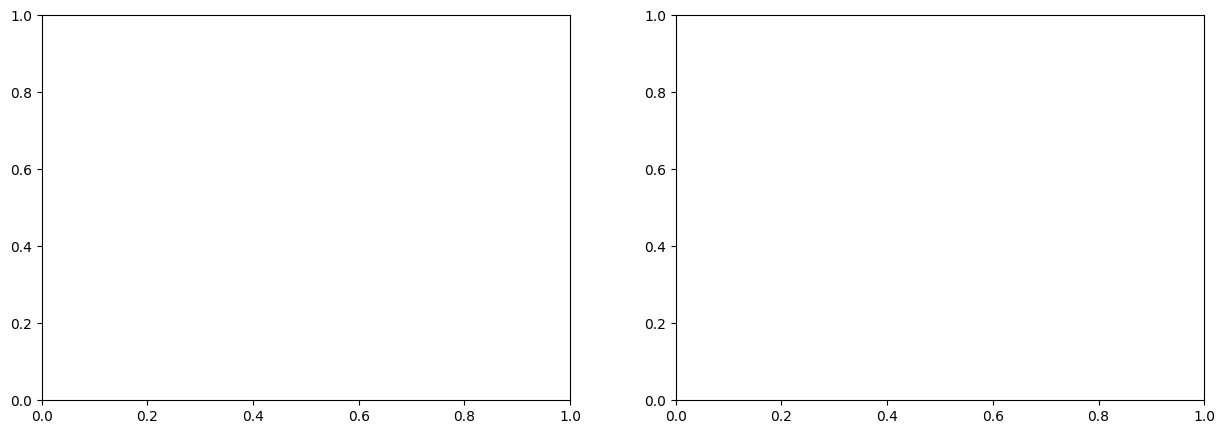

In [28]:
# Create subplots and call the functions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Call the functions with the appropriate axes
match_played(ax1)
attempts_target(ax2)

plt.show()
